In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt


X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])


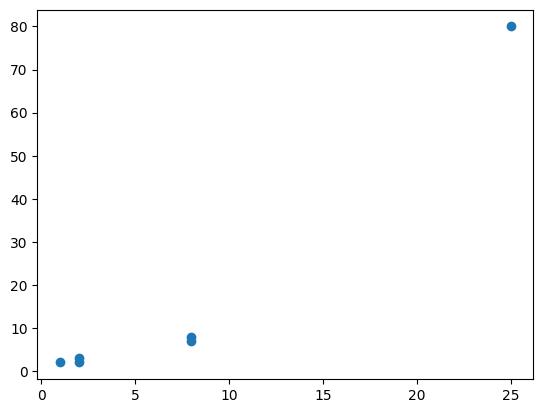

In [2]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()


In [3]:
db = DBSCAN(eps=10, min_samples=2)

db.fit(X)
db.labels_
# -1 == Outlier

array([ 0,  0,  0,  0,  0, -1], dtype=int64)

## Comparison between Kmean, Agglomerative (Hierarchical), DBSCAN

In [8]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [10]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [12]:
# Creating data points in the form of a circle
df1 = pd.DataFrame(PointsInCircum(500, 1000))
df2 = pd.DataFrame(PointsInCircum(300, 700))
df3 = pd.DataFrame(PointsInCircum(100, 300))

# Adding noise to the dataset
noise = [(np.random.randint(-600, 600), np.random.randint(-600, 600)) for _ in range(300)]
df_noise = pd.DataFrame(noise)

# Combine all dataframes using pd.concat
df = pd.concat([df1, df2, df3, df_noise], ignore_index=True)

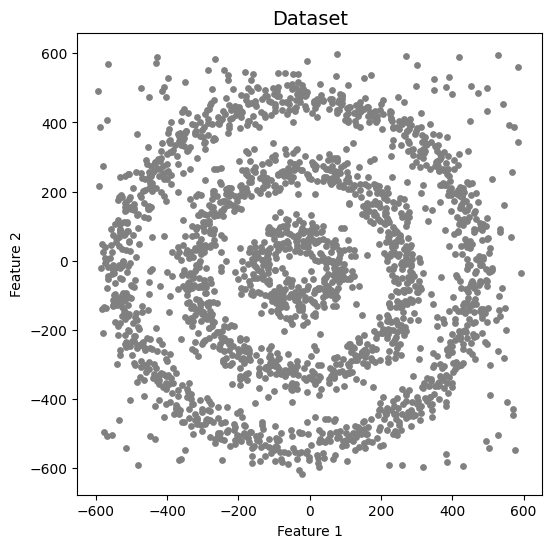

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=14)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

### Kmean

In [17]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

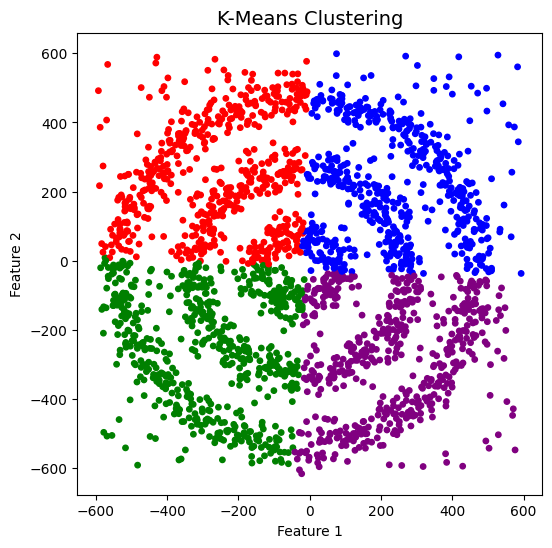

In [19]:
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(6, 6))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=14)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

### Hierarchical Clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4,)
model.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=4)

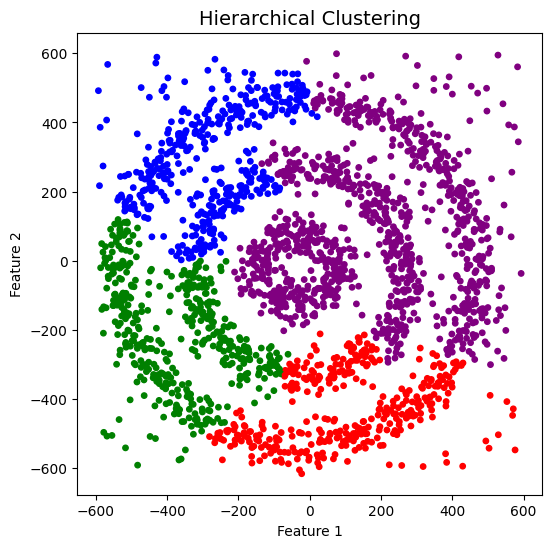

In [23]:
df['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(6, 6))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=14)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

### DBSCAN

In [24]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN() # Default, epsilon is 0.5, and min_samples or minPoints is 5. 
dbscan.fit(df[[0,1]])

DBSCAN()

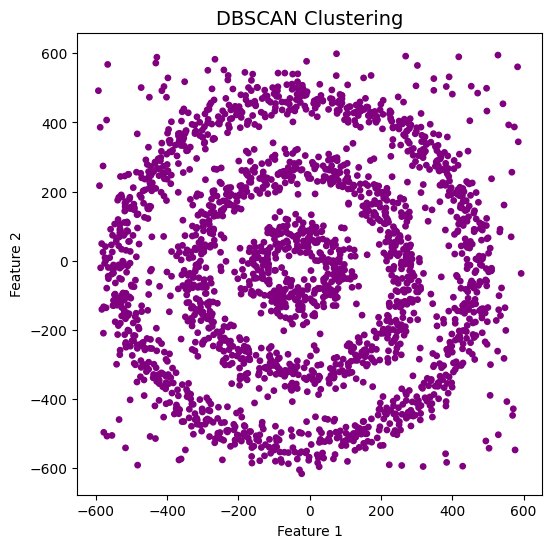

In [26]:
df['DBSCAN_labels']=dbscan.labels_
   
# Plotting resulting clusters
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=14)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

Interesting! All the data points are now purple, which means they are treated as noise. This is because the value of epsilon is very small, and we didn’t optimize parameters. Therefore, we need to find the value of epsilon and minPoints and then train our model again.

For Epsilon, I am using the K-distance graph. To plot a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.

In [32]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

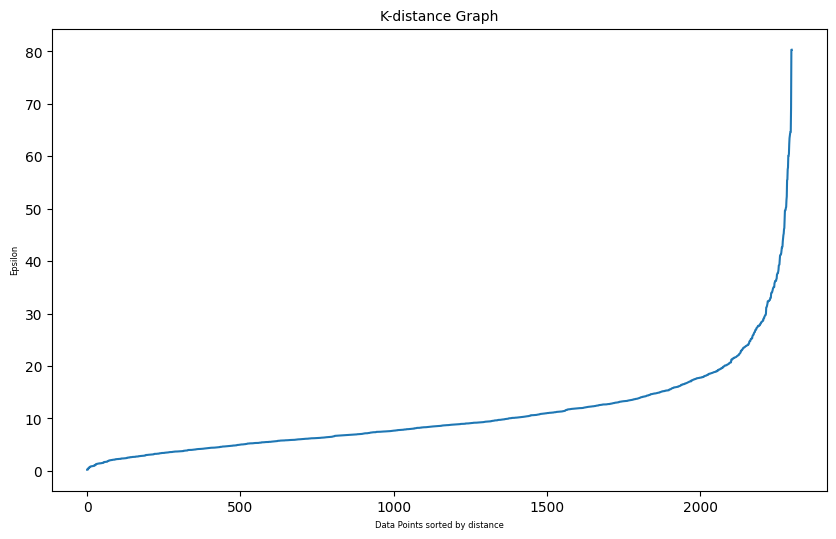

In [33]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=6)
plt.ylabel('Epsilon',fontsize=6)
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 30 in this case. Now, it’s time to find the value of minPoints. The value of minPoints also depends on domain knowledge. This time I am taking minPoints as 6:

In [34]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [35]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 6    737
 0    655
 7    316
 2    251
-1    223
 1     62
 5     47
 4      5
 3      4
Name: DBSCAN_opt_labels, dtype: int64

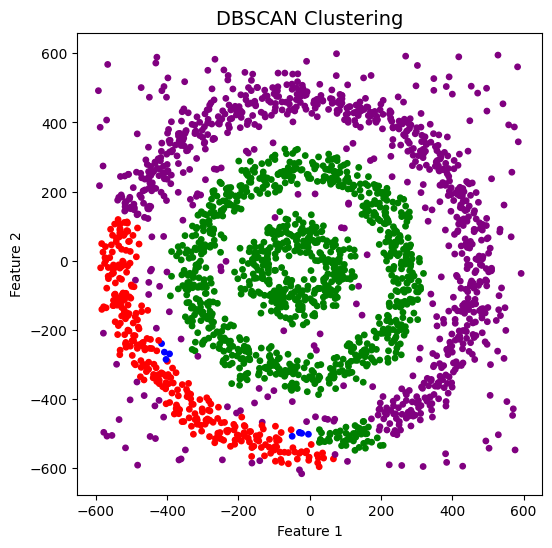

: 

In [ ]:
# Plotting the resulting clusters
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=14)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()